<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BPart4%2C_Chap9%5D_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EC%99%80_%EC%84%A0%ED%98%95_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 풀이법

In [1]:
import numpy as np
import pandas as pd

# 불규칙성 존재 seed 값 설정
seed = 1234
np.random.seed(seed)

# 정답 w0(y절편)=2.3 w1(기울기) = 3.5
w0 = 2.3
w1 = 3.5
num_data = 100
noise = np.random.normal(0, 3, num_data)

# 데이터 생성
x = np.linspace(0, 10, num_data)
y = w0 + w1 * x + noise

# 데이터 프레임으로 변환
data = pd.DataFrame({'x': x, 'y': y})

# 데이터 프레임 출력
print(data)


           x          y
0    0.00000   3.714305
1    0.10101  -0.919392
2    0.20202   7.305192
3    0.30303   2.422650
4    0.40404   1.552375
..       ...        ...
95   9.59596  35.640017
96   9.69697  35.205096
97   9.79798  38.177794
98   9.89899  33.739498
99  10.00000  35.764356

[100 rows x 2 columns]


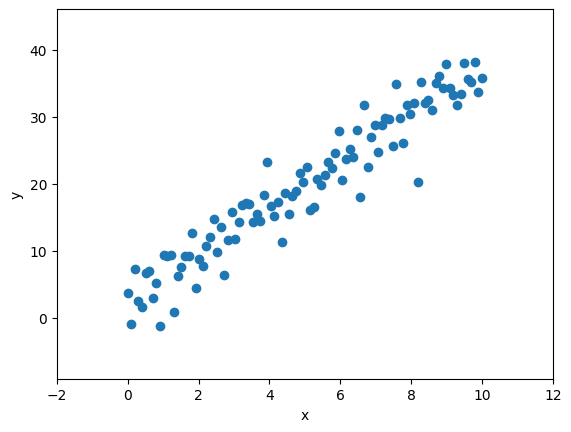

In [2]:
import matplotlib.pyplot as plt

# 데이터 프레임 그래프 그리기
plt.scatter(data['x'], data['y'])

# x축과 y축 이름 지정
plt.xlabel('x')
plt.ylabel('y')

# 여백 조정
plt.margins(0.2)

# 그래프 출력
plt.show()


In [4]:
# 풀이를 위한 데이터 정리
# 계산에 활용할 X를 생성

# y_hat = Xw
    # y_hat : [100, 1]
    # X : [100, 2]
    # w : [2, 1] (w0와 w1)

print('y의 크기 : ', y.shape) # [100, 1]
print('x의 크기 : ', x.shape) # [100, 1]

# x의 크기를 [100, 1]에서 [100, 2]으로 변경해야 함
# 1로만 이뤄진 벡터랑 x  100 by 2 벡터
X = np.stack([np.ones_like(x), x], axis=1)
print('X의 크기 : ', X.shape)

y의 크기 :  (100,)
x의 크기 :  (100,)
X의 크기 :  (100, 2)


## 정규 방정식으로 선형 회귀 문제 풀기

In [6]:
# 정규 방정식을 이용한 선형 모델 풀이
# w = (X^T X)-1 X^T y

def calc_OLS(X, y):
    # OLS 수식 적용 @ 메트릭스간에 곱
    # inv = 역행렬
    w_ols = np.linalg.inv(X.T @ X) @ X.T @ y
    return w_ols

w_ols = calc_OLS(X, y)

print('OLS로 예측한 w0 : ', w_ols[0])
print('OLS로 예측한 w1 : ', w_ols[1])
print('-'*50)

print('실제 w0 : ', w0)
print('실제 w1 : ', w1)

OLS로 예측한 w0 :  2.508679231829176
OLS로 예측한 w1 :  3.479331523509426
--------------------------------------------------
실제 w0 :  2.3
실제 w1 :  3.5


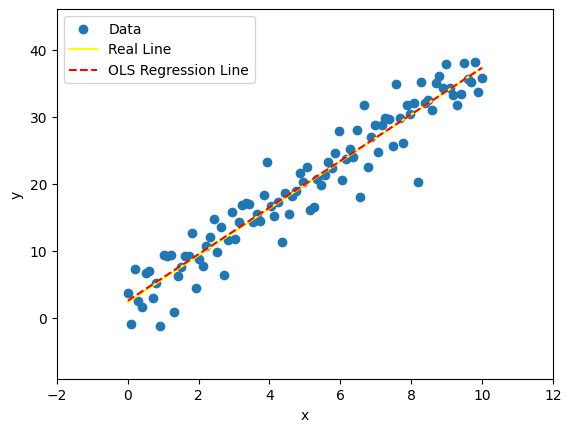

In [8]:
# 그림으로 결과 확인하기
y_real = w0 + w1 * x
y_pred_ols = w_ols[0] + w_ols[1] * x

plt.scatter(x, y, label='Data')

plt.plot(x, y_real, color='yellow', label='Real Line')
plt.plot(x, y_pred_ols, color='red', linestyle='--', label='OLS Regression Line')

plt.xlabel('x')
plt.ylabel('y')

plt.margins(0.2)
plt.legend()

plt.show()


## 확률적 경사 하강법으로 선형 회귀 문제 풀기

In [ ]:
np.random.seed(seed)

# 학습률 및 학습량 설정
lr = 0.0001
epochs = 1000
# 임의의 초기 파라미터 세팅
init_params = np.random.randn(2, 1)
print('초기 파라미터 크기 : ', init_params.shape)
print('초기 파라미터 값 : ', 'w0 : ', init_params[0][0], '/ w1 : ', init_params[1][0])

초기 파라미터 크기 :  (2, 1)
초기 파라미터 값 :  w0 :  0.47143516373249306 / w1 :  -1.1909756947064645


In [ ]:
def calc_SGD(x, y, lr, epochs, init_params):
    # 반복적인 계산을 위해 for문 활용
    for i in range(epochs):
        # 예측과 오차 계산뺏어 그대로 이제 여기다가
        y_pred = init_params[0] + init_params[1] * x
        error = y_pred - y

        # 그래디언트 계산
        gradient = 2 * X.T @ (X @ init_params - y.reshape(-1, 1)) # reshape : vector를 2차원 matrix로 변환

        # 파라미터 업데이트
        init_params -= lr * gradient
    return init_params

w_SGD = calc_SGD(x, y, lr, epochs, init_params)

print('SGD로 예측한 w0 : ', w_SGD[0][0])
print('SGD로 예측한 w1 : ', w_SGD[1][0])
print('-'*50)

print('실제 w0 : ', w0)
print('실제 w1 : ', w1)

SGD로 예측한 w0 :  2.499672260902627
SGD로 예측한 w1 :  3.480685813305615
--------------------------------------------------
실제 w0 :  2.3
실제 w1 :  3.5


## 다중공선성, Multicollinearity

In [ ]:
# 서로 상관 관계가 깊은 두 독립변수 x1과 x2를 생성
# x2 = x1

num_data = 100
noise = np.random.normal(0, 3, num_data)

w0_col = -0.5
w1_col = 1.8
w2_col = 3.3

# 데이터 생성
x1_col = np.linspace(0, 10, num_data)
x2_col = x1_col
y_col = w0_col + w1_col * x1_col + w2_col * x2_col + noise

X_col = np.stack([np.ones_like(x1_col), x1_col, x2_col], axis=1)

# 정규 방정식의 방식으로 문제를 해결하는 과정에서
# 계산되어야 하는 np.linalg.inv(X.T @ X)의 계산이 안됨
print(np.linalg.inv(X_col.T @ X_col))

LinAlgError: ignored

## SVD-OLS 방식으로 선형 회귀 문제 풀기


### 1. 다중공선성이 없는 경우 -> OLS와 동일한 해를 도출

In [ ]:
# SVD-OLS 방식을 이용한 선형 모델 풀이
# w = V @ SIGMA-1 @ U^T @ y

def calc_SVDOLS(X, y):
    # svd를 적용해 U, SIGMA, V^T(Vt)를 구함
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    SIGMA = np.diag(s)

    # SVD-OLS 수식 적용
    w_svdols = Vt.T @ np.linalg.inv(SIGMA) @ U.T @ y
    return w_svdols

w_svdols = calc_SVDOLS(X, y)
w_ols = calc_OLS(X, y)

print('SVD OLS로 예측한 w0 : ', w_svdols[0])
print('SVD OLS로 예측한 w1 : ', w_svdols[1])
print('-'*50)

print('OLS로 예측한 w0 : ', w_ols[0])
print('OLS로 예측한 w1 : ', w_ols[1])
print('-'*50)

print('실제 w0 : ', w0)
print('실제 w1 : ', w1)

SVD OLS로 예측한 w0 :  2.5086792318291633
SVD OLS로 예측한 w1 :  3.4793315235094275
--------------------------------------------------
OLS로 예측한 w0 :  2.508679231829176
OLS로 예측한 w1 :  3.479331523509426
--------------------------------------------------
실제 w0 :  2.3
실제 w1 :  3.5


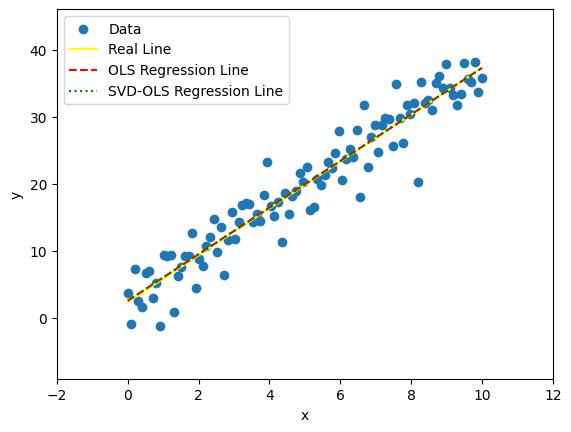

In [ ]:
# 그림으로 결과 확인하기
y_real = w0 + w1 * x
y_pred_ols = w_ols[0] + w_ols[1] * x
y_pred_svdols = w_svdols[0] + w_svdols[1] * x

plt.scatter(x, y, label='Data')

plt.plot(x, y_real, color='yellow', label='Real Line')
plt.plot(x, y_pred_ols, color='red', linestyle='--', label='OLS Regression Line')
plt.plot(x, y_pred_svdols, color='green', linestyle='dotted', label='SVD-OLS Regression Line')

plt.xlabel('x')
plt.ylabel('y')

plt.margins(0.2)
plt.legend()

plt.show()

### 2. 다중공선성이 있는 경우 -> 해를 구할 수 없던 OLS와 다르게 해 도출 가능

- 해는 존재하지만 값은 정답과 거리가 있음  

In [ ]:
w_svdols = calc_SVDOLS(X_col, y_col)

print('SVD OLS로 예측한 w0 : ', w_svdols[0])
print('SVD OLS로 예측한 w1 : ', w_svdols[1])
print('SVD OLS로 예측한 w2 : ', w_svdols[2])
print('-'*50)

print('실제 w0 : ', w0_col)
print('실제 w1 : ', w1_col)
print('실제 w2 : ', w2_col)


SVD OLS로 예측한 w0 :  -0.24271753635545057
SVD OLS로 예측한 w1 :  913269366762999.0
SVD OLS로 예측한 w2 :  -913269366762993.5
--------------------------------------------------
실제 w0 :  -0.5
실제 w1 :  1.8
실제 w2 :  3.3


## SKlearn 내장 함수를 이용

### 1. 다중공선성이 없는 경우

In [ ]:
from sklearn.linear_model import LinearRegression

w_svdols = calc_SVDOLS(X, y)
w_ols = calc_OLS(X, y)
w_SGD = calc_SGD(x, y, lr, epochs, init_params)
linear_reg = LinearRegression()
linear_reg.fit(X, y)

print('OLS로 예측한 w0 : ', w_ols[0])
print('OLS로 예측한 w1 : ', w_ols[1])
print('-'*50)

print('SVD OLS로 예측한 w0 : ', w_svdols[0])
print('SVD OLS로 예측한 w1 : ', w_svdols[1])
print('-'*50)

print('SGD로 예측한 w0 : ', w_SGD[0][0])
print('SGD로 예측한 w1 : ', w_SGD[1][0])
print('-'*50)

print('내장 함수로 예측한 w0 : ', linear_reg.intercept_)
print('내장 함수로 예측한 w1 : ', linear_reg.coef_[1])
print('-'*50)

print('실제 w0 : ', w0)
print('실제 w1 : ', w1)

OLS로 예측한 w0 :  2.508679231829176
OLS로 예측한 w1 :  3.479331523509426
--------------------------------------------------
SVD OLS로 예측한 w0 :  2.5086792318291633
SVD OLS로 예측한 w1 :  3.4793315235094275
--------------------------------------------------
SGD로 예측한 w0 :  2.508617090523525
SGD로 예측한 w1 :  3.479340867087513
--------------------------------------------------
내장 함수로 예측한 w0 :  2.508679231829163
내장 함수로 예측한 w1 :  3.4793315235094293
--------------------------------------------------
실제 w0 :  2.3
실제 w1 :  3.5


### 2. 다중공선성이 있는 경우

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_col, y)

print('내장 함수로 예측한 w0 : ', linear_reg.intercept_)
print('내장 함수로 예측한 w1 : ', linear_reg.coef_[1])
print('내장 함수로 예측한 w2 : ', linear_reg.coef_[2])
print('-'*50)

print('실제 w0 : ', w0_col)
print('실제 w1 : ', w1_col)
print('실제 w2 : ', w2_col)


내장 함수로 예측한 w0 :  2.5086792318291593
내장 함수로 예측한 w1 :  1.7396657617547149
내장 함수로 예측한 w2 :  1.7396657617547153
--------------------------------------------------
실제 w0 :  -0.5
실제 w1 :  1.8
실제 w2 :  3.3


## 라쏘(Lasso)와 릿지(Ridge) 회귀

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print('Lasso 예측 w0 와 w1 : ', lasso_reg.intercept_, lasso_reg.coef_[1])

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X, y)
print('Ridge 예측 w0 와 w1 : ', ridge_reg.intercept_, ridge_reg.coef_[1])
print('-'*50)

print('실제 w0 : ', w0)
print('실제 w1 : ', w1)

Lasso 예측 w0 와 w1 :  2.5674911130172795 3.467569147271806
Ridge 예측 w0 와 w1 :  2.510725251490374 3.4789223195771872
--------------------------------------------------
실제 w0 :  2.3
실제 w1 :  3.5


# 선형 분류 풀이법

In [ ]:
import numpy as np

seed = 1234
np.random.seed(seed)

# 데이터 생성
num_sample_per_class = 250

# 클래스 1의 데이터 생성 (평균: [2, 2], 표준편차: 1.0)
X_class1 = np.random.normal(2, 1, (num_sample_per_class, 2))

# 클래스 2의 데이터 생성 (평균: [-2, -2], 표준편차: 1.0)
X_class2 = np.random.normal(-2, 1, (num_sample_per_class, 2))


X_ = np.vstack([X_class1, X_class2]) # feature 두 개를 묶어주고 (250, 2) + (250, 2) -> (500, 2)
X = np.hstack([np.ones((num_sample_per_class * 2, 1)), X_]) # 1개의 bias를 추가 (500, 2) -> (500, 3)
y = np.array([1] * num_sample_per_class + [0] * num_sample_per_class)  # 클래스 레이블 생성

In [ ]:
X.shape, y.shape

((500, 3), (500,))

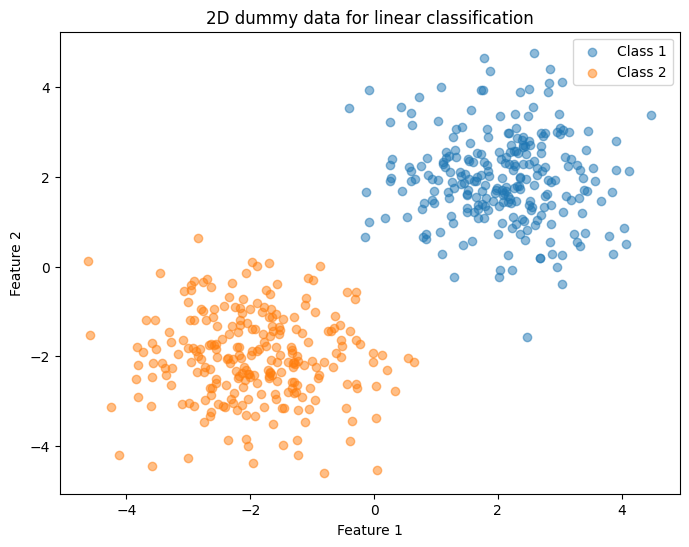

In [ ]:
import matplotlib.pyplot as plt

# 클래스별 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

# 그래프 설정
plt.title('2D dummy data for linear classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 그래프 출력
plt.show()


## SGD를 활용한 선형 분류 문제 풀이

In [ ]:
# SGD를 활용한 선형 분류 문제 풀이
np.random.seed(seed)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, p):
    return -(y * np.log(p) + (1-y) * np.log(1-p))

def calc_logistic_SGD(X, y, lr, epochs, init_params):
    N = len(y)
    y = y.reshape((-1, 1))
    for i in range(epochs):
        # 로짓 산출
        logit = X @ init_params

        # 확률 도출
        p = sigmoid(logit)

        # 비용 함수 계산
        loss = log_loss(y, p)
        loss = loss.mean

        # 그래디언트 계산
        gradient = 1/N * X.T @ (p-y)

        # 파라미터 업데이트
        init_params -= lr * gradient

    return init_params

# 초기 파라미터, 학습률, 에포크 설정
init_params = np.random.randn(X.shape[1], 1)
lr = 0.01
epochs = 3000

# SGD 경사 하강법 적용
params = calc_logistic_SGD(X, y, lr, epochs, init_params)
params

array([[0.25125164],
       [1.13050808],
       [2.25518135]])

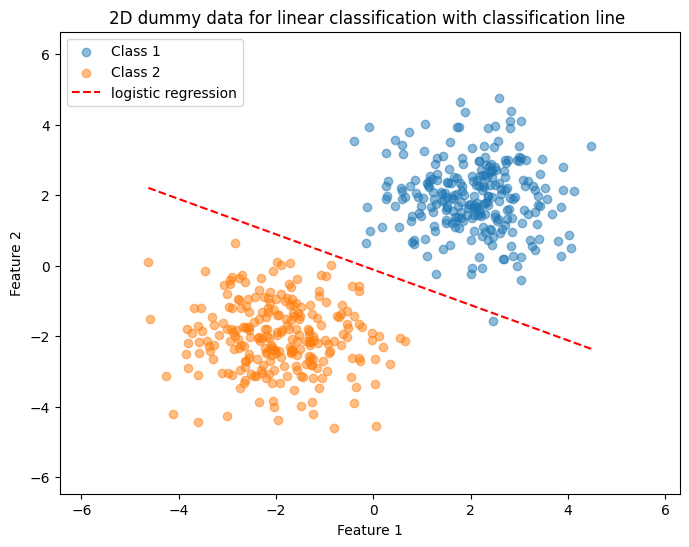

In [ ]:
# 그림으로 결과 확인하기
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

# 결정 경계는 logit = 0 인 지점에서 생성
# w0 + w1 * feature1 + w2 * feature2 = 0
w0, w1, w2 = params.T[0]

# feature1을 x축으로 보고
# y축에 해당하는 feature2 값을 구함
# feature 2 = -(w0 + w1 * feature1)/w2
feauter1_value = np.array([X[:, 1].min(), X[:, 1].max()])
feature2_value = -(w0 + w1 * feauter1_value) / w2

plt.plot(feauter1_value, feature2_value, color='red', linestyle='--', label='logistic regression')

plt.title('2D dummy data for linear classification with classification line ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.margins(0.2)
plt.legend()

plt.show()


## sklearn 내장 함수를 활용한 선형 분류 문제 풀이

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=seed)
sgd_clf.fit(X, y)

sgd_clf.coef_, sgd_clf.intercept_

(array([[-1.57775549e-15,  7.00664880e+00,  5.42903165e+00]]),
 array([1.15826702]))

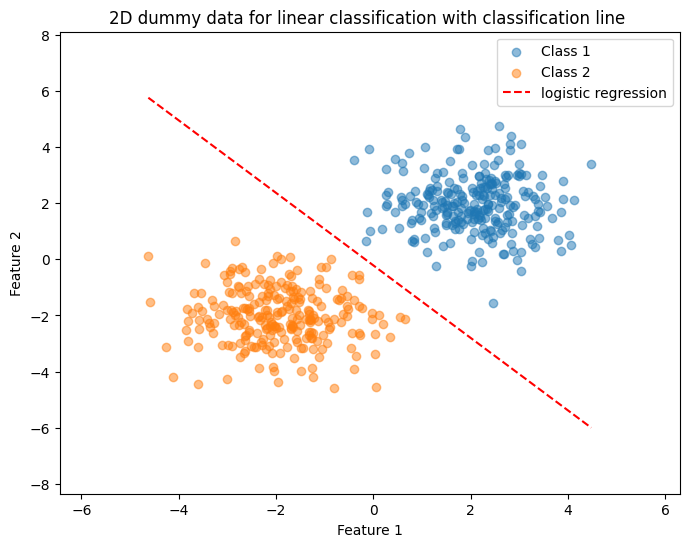

In [ ]:
# 그림으로 결과 확인하기
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

# 결정 경계는 logit = 0 인 지점에서 생성
# w0 + w1 * feature1 + w2 * feature2 = 0
w0 = sgd_clf.intercept_[0]
w1, w2 = sgd_clf.coef_[0][1:]

# feature1을 x축으로 보고
# y축에 해당하는 feature2 값을 구함
# feature 2 = -(w0 + w1 * feature1)/w2
feauter1_value = np.array([X[:, 1].min(), X[:, 1].max()])
feature2_value = -(w0 + w1 * feauter1_value) / w2

plt.plot(feauter1_value, feature2_value, color='red', linestyle='--', label='logistic regression')

plt.title('2D dummy data for linear classification with classification line ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.margins(0.2)
plt.legend()

plt.show()